# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data

In [3]:
cars_prices = pd.read_csv("C:\\Users\\jyoth\\OneDrive\\Desktop\\Internshala\\Mechademy\\cars_price.csv", index_col="S.No.")
cars_prices.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
S.No.,,,,,,,,,,,,
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
cars_prices.shape

(40000, 12)

In [5]:
cars_prices.isna().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [6]:
cars_prices.isna().sum()/cars_prices.shape[0]

make                   0.000000
model                  0.000000
priceUSD               0.000000
year                   0.000000
condition              0.000000
mileage(kilometers)    0.000000
fuel_type              0.000000
volume(cm3)            0.000750
color                  0.000000
transmission           0.000000
drive_unit             0.033625
segment                0.093875
dtype: float64

Since the null values make up only a small percentage of the data records, they are dropped.

In [7]:
cars_prices.dropna(inplace=True)

In [8]:
cars_prices.shape

(35016, 12)

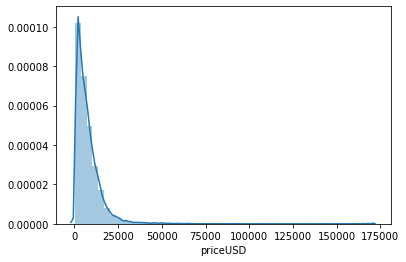

In [9]:
sns.distplot(cars_prices.priceUSD)

From the above plot, we see that the distribution of the car prices is right skewed. This means that a large proportion of the cars are sold at a price in the lower range. Only a few of the cars in the dataset are luxury cars.

In [13]:
cars_prices.corr()

,priceUSD,year,mileage(kilometers),volume(cm3)
priceUSD,1.000000,0.643067,-0.179098,0.268773
year,0.643067,1.000000,-0.245647,0.028499
mileage(kilometers),-0.179098,-0.245647,1.000000,0.019253
volume(cm3),0.268773,0.028499,0.019253,1.000000


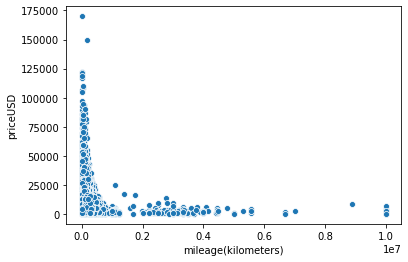

In [12]:
sns.scatterplot(data=cars_prices, x='mileage(kilometers)', y='priceUSD')

In [14]:
#Range of Mileage values
print("Max: ", cars_prices['mileage(kilometers)'].max())
print("Min: ", cars_prices['mileage(kilometers)'].min())

Max:  9999999.0
Min:  0.0


In [16]:
cars_prices[cars_prices['mileage(kilometers)']<50].shape

(327, 12)

In [15]:
#Range of Volume values
print("Max: ", cars_prices["volume(cm3)"].max())
print("Min: ", cars_prices["volume(cm3)"].min())

Max:  20000.0
Min:  500.0


In [18]:
cars_prices[cars_prices['volume(cm3)']<3000].shape

(30914, 12)

The Mileage and Volume values in the given dataset are not within their usual ranges.
Using domain knowledge, out of 40,000 records, only 327 have values in the normal range for Mileage. However, 34,670 records have normal Volume values.
Hence, to make sense of the data, the Mileage column is dropped. In addition, only a subset of the dataset containing normal Volume values are considered.

# Subsetting the dataset

In [19]:
subdf = cars_prices[cars_prices['volume(cm3)']<5000]

In [20]:
subdf.drop('mileage(kilometers)', axis=1, inplace=True)

C:\Users\jyoth\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
subdf.shape

(34670, 11)

In [73]:
subdf.columns

Index(['make', 'model', 'priceUSD', 'year', 'condition', 'fuel_type',
       'volume(cm3)', 'color', 'transmission', 'drive_unit', 'segment',
       'Volume_CI', 'Year_CI'],
      dtype='object')

In [74]:
subdf.head()

,make,model,priceUSD,year,condition,fuel_type,volume(cm3),color,transmission,drive_unit,segment,Volume_CI,Year_CI
S.No.,,,,,,,,,,,,,
0,honda,accord,565,1993,with mileage,petrol,2000.0,black,mechanics,front-wheel drive,D,3,5
1,ford,fusion,5550,2008,with mileage,diesel,1400.0,silver,mechanics,front-wheel drive,M,2,8
2,nissan,teana,8300,2008,with mileage,petrol,2500.0,purple,auto,front-wheel drive,D,4,8
3,volkswagen,fox,3300,2005,with mileage,petrol,1200.0,blue,mechanics,front-wheel drive,A,1,7
4,nissan,primera,2450,2002,with damage,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,3,7


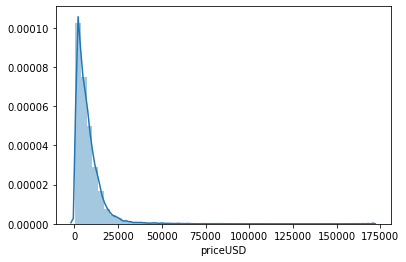

In [23]:
sns.distplot(subdf.priceUSD)

# Bivariate

In [58]:
def scatterplot(df,col):
    sns.scatterplot(data=df, x=col, y='priceUSD')
    plt.ylabel('priceUSD')
    plt.xlabel(col)
    plt.title('Boxplot for the column ' + col )
    plt.show()

In [59]:
def boxplot(df,col):
    sns.boxplot(x=col, y='priceUSD',data=df)
    plt.ylabel('priceUSD')
    plt.xlabel(col)
    plt.title('Boxplot for the column ' + col )
    plt.show()

In [60]:
def kde(df, col):
    df.groupby([col])['priceUSD'].plot.kde()
    plt.ylabel('Probability')
    plt.xlabel('Car Prices (in USD)')
    plt.title('KDE Plot for the column ' + col )
    plt.legend(labels=df[col].unique().tolist())
    plt.show()

In [35]:
def cat_bivar(df, col):
    print("Mean:")
    print(round(df.groupby([col])['priceUSD'].mean(), 2))
    print("Boxplot:")
    boxplot(df,col)
    print("KDE Plot:")
    kde(df, col)
    print("Kruskal-Wallis Test:")
    print(stats.kruskal(*[group["priceUSD"].values for name, group in df.groupby(col)]))    
    

## Volume (cm3)

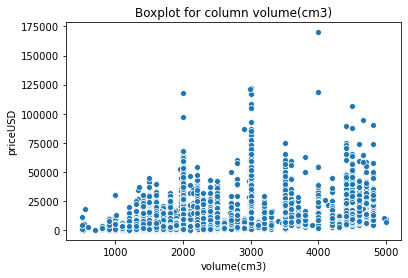

In [29]:
scatterplot(subdf, col='volume(cm3)')

In [32]:
subdf['Volume_CI'] = pd.cut(subdf['volume(cm3)'],bins=10, labels=False)

<ipython-input-32-49177b25ae0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['Volume_CI'] = pd.cut(subdf['volume(cm3)'],bins=10, labels=False)


In [33]:
subdf['Volume_CI'].value_counts()

2    13456
3    11016
4     4394
5     2104
1     1601
6     1112
8      473
9      221
7      218
0       75
Name: Volume_CI, dtype: int64

Mean:
Volume_CI
0     2717.24
1     3650.38
2     5640.82
3     6858.72
4     7330.42
5    15339.61
6    12872.03
7    12984.46
8    15414.76
9    20215.73
Name: priceUSD, dtype: float64
Boxplot:


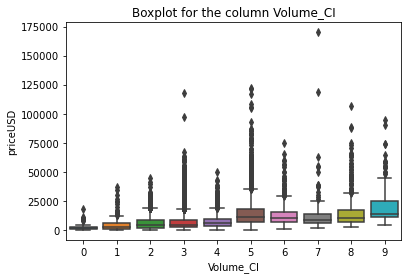

KDE Plot:


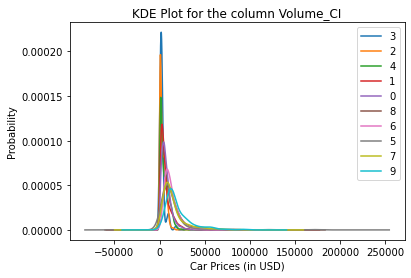

Kruskal-Wallis Test:
KruskalResult(statistic=4674.779500306277, pvalue=0.0)


In [61]:
cat_bivar(subdf, col="Volume_CI")

To check if the car prices is affected by volume, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each volume CI is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Volume CI) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by Volume. The same inferences can be drawn from the plots as well.

*CI - Class interval

## Year of manufacture

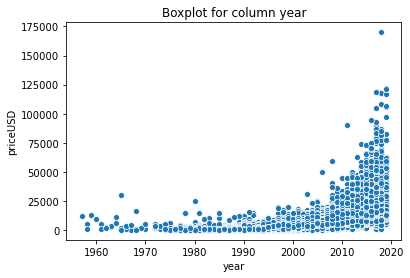

In [40]:
scatterplot(subdf,col='year')

In [42]:
subdf['Year_CI'] = pd.cut(subdf['year'],bins=10, labels=False)

<ipython-input-42-181ee767078b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['Year_CI'] = pd.cut(subdf['year'],bins=10, labels=False)


In [43]:
subdf['Year_CI'].value_counts()

8    8907
6    8570
7    8096
9    4851
5    3003
4    1097
3      90
2      26
1      18
0      12
Name: Year_CI, dtype: int64

Mean:
Year_CI
0     4950.58
1     4933.44
2     2784.77
3     1765.52
4     1098.26
5     1551.45
6     2596.04
7     5737.48
8    10134.55
9    17663.10
Name: priceUSD, dtype: float64
Boxplot:


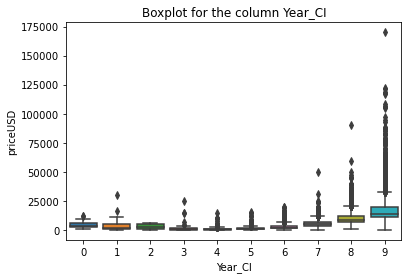

KDE Plot:


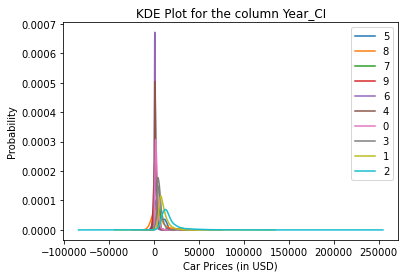

Kruskal-Wallis Test:
KruskalResult(statistic=25207.152707625, pvalue=0.0)


In [62]:
cat_bivar(subdf, col='Year_CI')

To check if the car prices is affected by the Year of manufacture, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Year CI is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Year CI) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the Year of manufacture. The same inferences can be drawn from the plots as well.

*CI - Class interval

## Conditiion

In [45]:
subdf.condition.value_counts()

with mileage    34150
with damage       262
for parts         258
Name: condition, dtype: int64

Mean:
condition
for parts        563.41
with damage     2689.60
with mileage    7321.93
Name: priceUSD, dtype: float64
Boxplot:


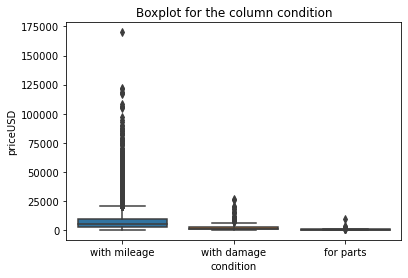

KDE Plot:


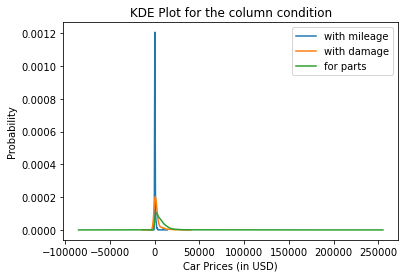

Kruskal-Wallis Test:
KruskalResult(statistic=950.4357443781013, pvalue=4.125726232758448e-207)


In [63]:
cat_bivar(subdf, col='condition')

To check if the car prices is affected by the Condition, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Condition is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Condition) is 0. 
Since the p-value is nearly 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by Condition. The same inferences can be drawn from the plots as well.

## Fuel Type

In [47]:
subdf.fuel_type.value_counts()

petrol    22005
diesel    12665
Name: fuel_type, dtype: int64

Mean:
fuel_type
diesel    8512.52
petrol    6502.29
Name: priceUSD, dtype: float64
Boxplot:


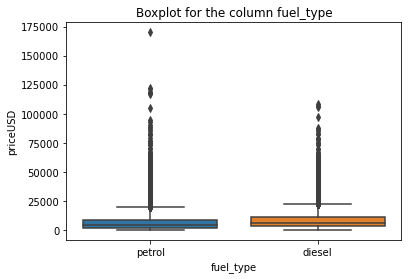

KDE Plot:


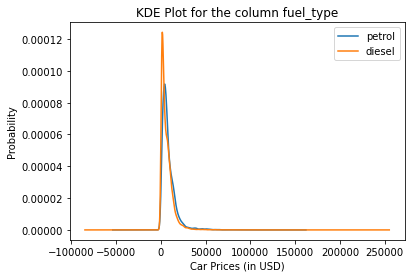

Kruskal-Wallis Test:
KruskalResult(statistic=1054.3105949740007, pvalue=2.8145438605471345e-231)


In [64]:
cat_bivar(subdf, col='fuel_type')

To check if the car prices is affected by the Fuel Type, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Fuel Type is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Fuel Type) is 0. 
Since the p-value is nearly 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the type of fuel the vehicle uses. The same inferences can be drawn from the plots as well.

## Drive Unit

In [52]:
subdf.drive_unit.value_counts()

front-wheel drive             24673
rear drive                     4238
all-wheel drive                3668
part-time four-wheel drive     2091
Name: drive_unit, dtype: int64

Mean:
drive_unit
all-wheel drive               16471.04
front-wheel drive              5623.12
part-time four-wheel drive    12027.27
rear drive                     6274.22
Name: priceUSD, dtype: float64
Boxplot:


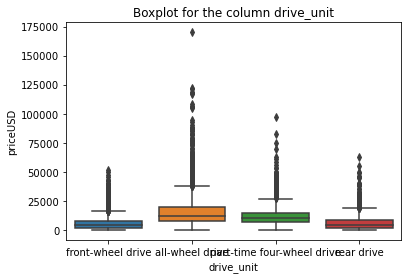

KDE Plot:


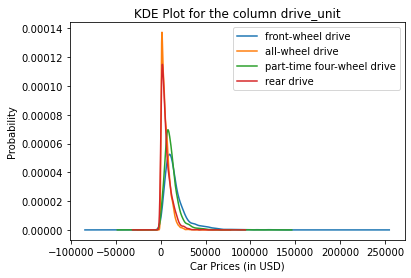

Kruskal-Wallis Test:
KruskalResult(statistic=5909.279651837215, pvalue=0.0)


In [65]:
cat_bivar(subdf, col='drive_unit')

To check if the car prices is affected by the Drive Unit, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Drive Unit is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Drive Unit) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the Drive Unit of the vehicle. The same inferences can be drawn from the plots as well.

## Transmission

In [54]:
subdf.transmission.value_counts()

mechanics    22499
auto         12171
Name: transmission, dtype: int64

Mean:
transmission
auto         12087.13
mechanics     4612.72
Name: priceUSD, dtype: float64
Boxplot:


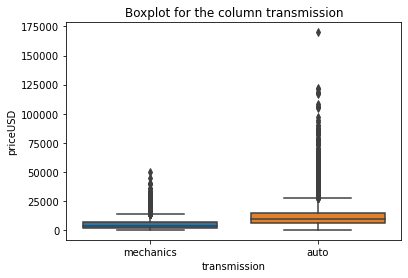

KDE Plot:


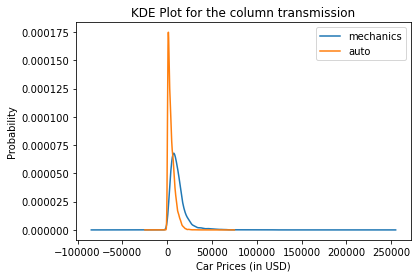

Kruskal-Wallis Test:
KruskalResult(statistic=9899.295774928996, pvalue=0.0)


In [67]:
cat_bivar(subdf,'transmission')

To check if the car prices is affected by the Transmission feature, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Transmission is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Transmission) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the Transmission of the vehicle. The same inferences can be drawn from the plots as well.

## Segment

In [56]:
subdf.segment.value_counts()

D    8689
C    7187
J    5865
M    4364
E    4278
B    2975
F     588
S     410
A     314
Name: segment, dtype: int64

Mean:
segment
A     4601.28
B     4365.29
C     4913.88
D     5376.67
E     6263.16
F    10714.06
J    14280.56
M     6950.62
S    17675.51
Name: priceUSD, dtype: float64
Boxplot:


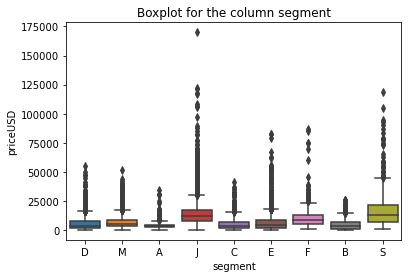

KDE Plot:


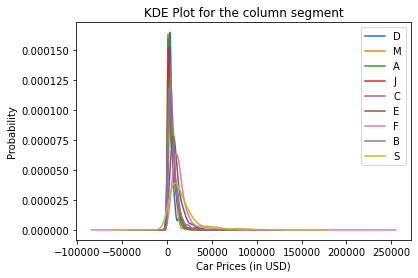

Kruskal-Wallis Test:
KruskalResult(statistic=8158.560816029471, pvalue=0.0)


In [68]:
cat_bivar(subdf, col='segment')

To check if the car prices is affected by the Segment feature, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Segment is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Segment) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the Segment of the vehicle. The same inferences can be drawn from the plots as well.

## Colour

In [69]:
subdf.color.value_counts()

black       7639
silver      6305
blue        5053
gray        3602
white       3255
green       2379
other       2027
red         1672
burgundy    1265
brown        803
purple       385
yellow       166
orange       119
Name: color, dtype: int64

Mean:
color
black       10503.90
blue         5069.19
brown       12869.33
burgundy     4311.24
gray         8191.24
green        3032.11
orange       6862.92
other        6395.28
purple       4330.39
red          4353.20
silver       6182.09
white        9237.70
yellow       4588.36
Name: priceUSD, dtype: float64
Boxplot:


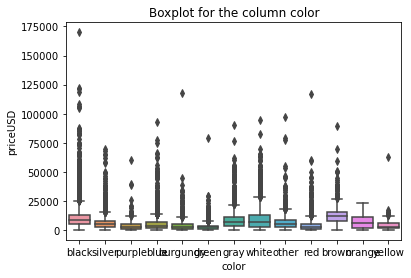

KDE Plot:


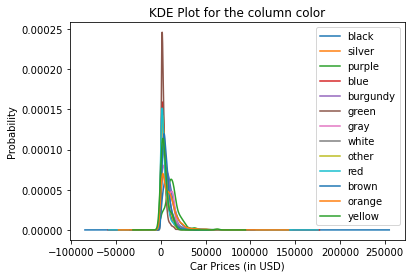

Kruskal-Wallis Test:
KruskalResult(statistic=6204.555079714337, pvalue=0.0)


In [70]:
cat_bivar(subdf,'color')

Observing the p-value from the Kruskal-Wallis test (pvalue=0), we conclude that the colour of the car also affects the price at which the car is sold.